# Módulo 5 - Técnicas de Programação II
## Aula 5
- Gráficos com Seaborn
- Exercícios

## Gráficos com Seaborn
Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.
  
**Documentação**: https://seaborn.pydata.org/  
**Paleta de cores**: https://seaborn.pydata.org/tutorial/color_palettes.html

### Instalação
Caso não tenha instalado o pacote do **Seaborn** ou está na dúvida, basta rodar o seguinte código:

In [ ]:
!pip install seaborn

### Import da biblioteca
  
Como já é padrão importaremos a biblioteca seaborn. Diferentemente do matplotlib e plotly, não será necessário indicar um submódulo.

In [1]:
import seaborn as sns

Novamente iniciaremos a notação de entendimento da biblioteca com um exemplo simples com apenas duas listas, *x* e *y*, contenco alguns pontos. Para utilizar o **seaborn** basta chamá-lo por meio do alias sns seguido do tipo de gráfico desejado.

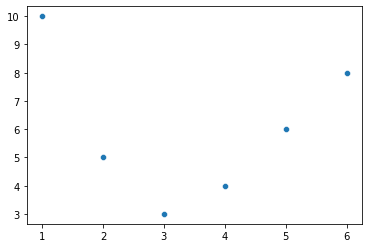

In [3]:
x = [1, 2, 3, 4, 5 ,6]
y = [10, 5, 3, 4, 6, 8]
sns.scatterplot(x=x,y=y);

Você pode notar que o gráfico é extremamente semelhante ao proveniente do matplotlib, o que não é por acaso, visto que o seaborn é baseado no próprio matplotlib.

Vamos importar também outros pacotes padrões

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Scatter (dispersão)
**Documentação**: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

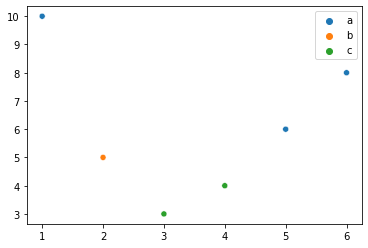

In [3]:
x = [1, 2, 3, 4, 5 ,6]
y = [10, 5, 3, 4, 6, 8]
z=['a', 'b', 'c', 'c', 'a', 'a']
sns.scatterplot(x=x,
                y=y,
                hue=z);

Importando o dataset dos pinguins

In [7]:
df_size = pd.read_csv('data/penguins_size.csv', sep=',')
df_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


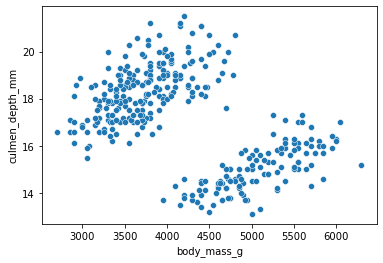

In [16]:
sns.scatterplot(data=df_size, x='body_mass_g', y='culmen_depth_mm');

Podemos alterar as cores dos marcadores através de alguma variável do próprio dataframe como por exemplo o sexo dos pinguins.  O parâmetro *hue* é responsável pela mudança das cores na marcação dos pontos por meio de uma das colunas do próprio dataframe.

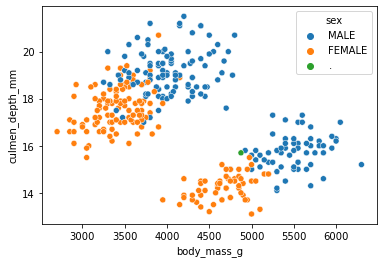

In [8]:
sns.scatterplot(data=df_size, x='body_mass_g', y='culmen_depth_mm', hue='sex');

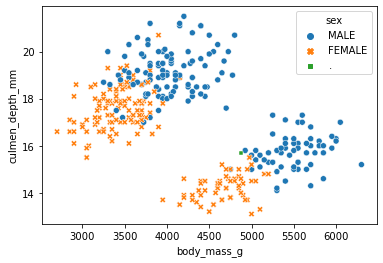

In [9]:
sns.scatterplot(data=df_size, x='body_mass_g', y='culmen_depth_mm', hue='sex', style='sex');

Estilizando o gráfico.

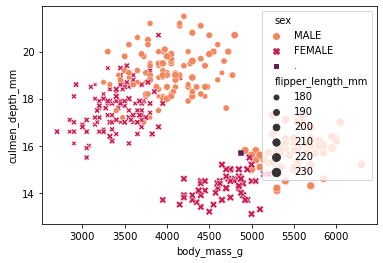

In [14]:
sns.scatterplot(data=df_size,
                x='body_mass_g', 
                y='culmen_depth_mm',
                hue='sex', 
                style='sex',
                palette='rocket_r', 
                size='flipper_length_mm');

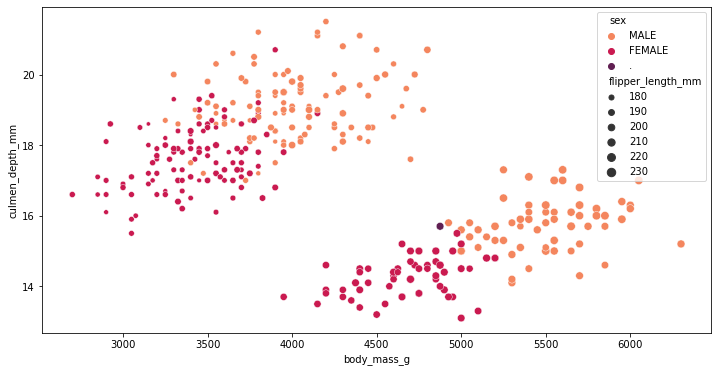

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_size,
                x='body_mass_g',
                y='culmen_depth_mm', 
                hue='sex',
                palette='rocket_r',
                size='flipper_length_mm');

O Seaborn possui uma plotagem semelhante ao scatter, porém feito automaticamente com todas as variáveis contínuas, o **pairplot**

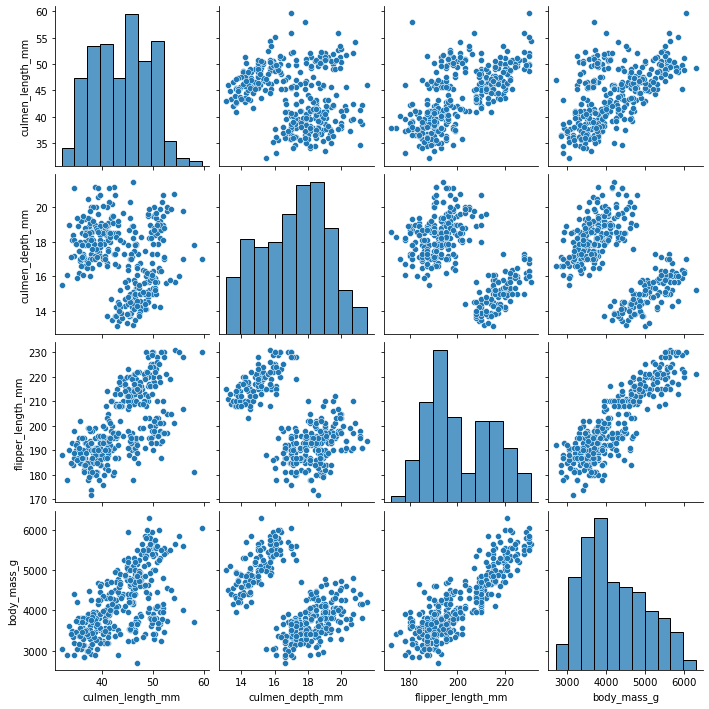

In [12]:
sns.pairplot(data=df_size);

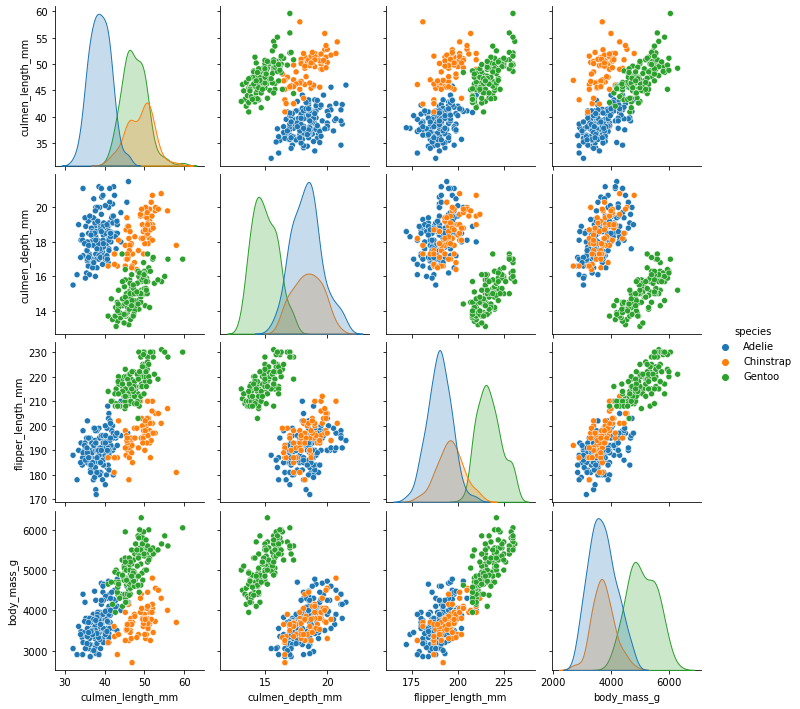

In [44]:
sns.pairplot(data=df_size, hue='species');

## Linhas
**Documentação**: https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [27]:
df_supermarket = pd.read_csv('.\data\supermarket_sales.csv')
df_supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [28]:
df_supermarket['Date'] = pd.to_datetime(df_supermarket['Date'])

Na última aula nós tentamos criar um gráfico com o dataframe todo, porém como havia diversos pontos na mesma data, não foi possível visualizar a informação. O Seaborn trata esta questão de forma automática. A linha azul mais escura representa a *média* dos valores dentro do mesmo dia e o sombreado o intervalo com 95% de confiança.

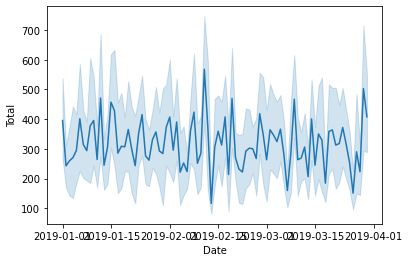

In [29]:
sns.lineplot(data=df_supermarket, x='Date', y='Total');

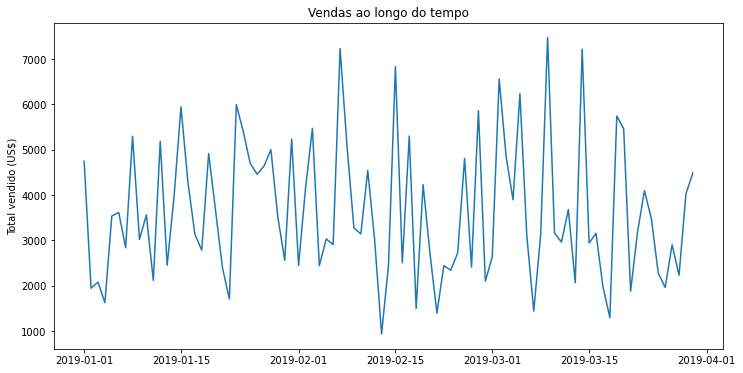

In [30]:
df_total=df_supermarket.pivot_table(index='Date', values='Total', aggfunc='sum')

plt.figure(figsize=(12,6))

ax = sns.lineplot(x=df_total.index, y=df_total['Total'])

ax.set_title('Vendas ao longo do tempo')
ax.set_ylabel('Total vendido (US$)')
ax.set_xlabel('');

**No mesmo Eixo**

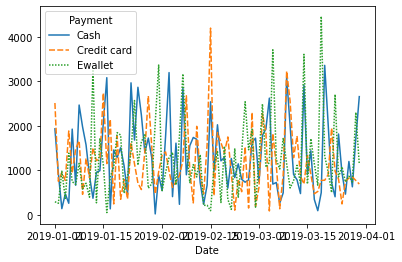

In [31]:
df_payment=df_supermarket.pivot_table(index='Date', columns='Payment', values='Total', aggfunc='sum')
sns.lineplot(data=df_payment);

Podemos estilizar o gráfico

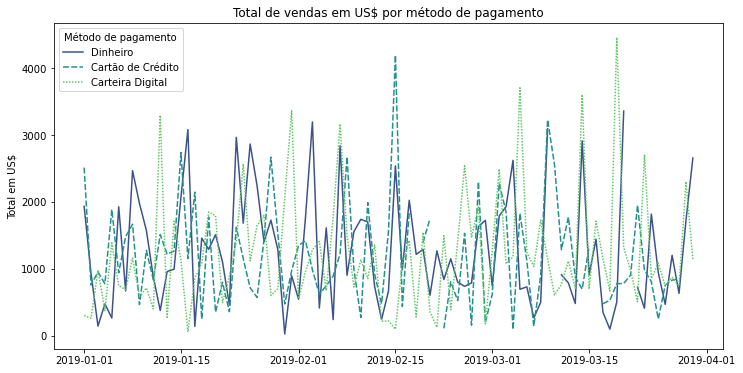

In [18]:
df_payment=df_supermarket.pivot_table(index='Date', columns='Payment', values='Total', aggfunc='sum')

plt.figure(figsize=(12,6))
ax=sns.lineplot(data=df_payment, palette='viridis')

ax.set_title('Total de vendas em US$ por método de pagamento')
ax.set_xlabel('')
ax.set_ylabel('Total em US$')
ax.legend(['Dinheiro', 'Cartão de Crédito', 'Carteira Digital'], loc='upper left', title='Método de pagamento');

**Em vários eixos**  
Para realizar o plot do gráfico acima, porém agora em três gráficos separados, é possível utilizar o **subplots** do matplotlib e posteriormente passar cada um dos eixos criados para dentro do gráfico do **seaborn** com o parâmetro *ax*.

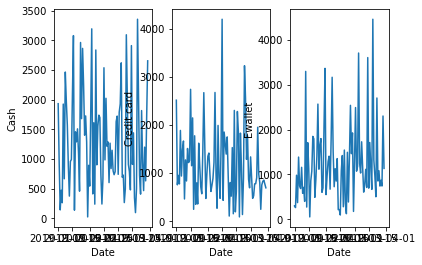

In [35]:
df_payment.reset_index(inplace=True)

fig, ax = plt.subplots(1, 3)

sns.lineplot(data=df_payment, x='Date', y='Cash', ax=ax[0])
sns.lineplot(data=df_payment, x='Date', y='Credit card', ax=ax[1])
sns.lineplot(data=df_payment, x='Date', y='Ewallet', ax=ax[2]);

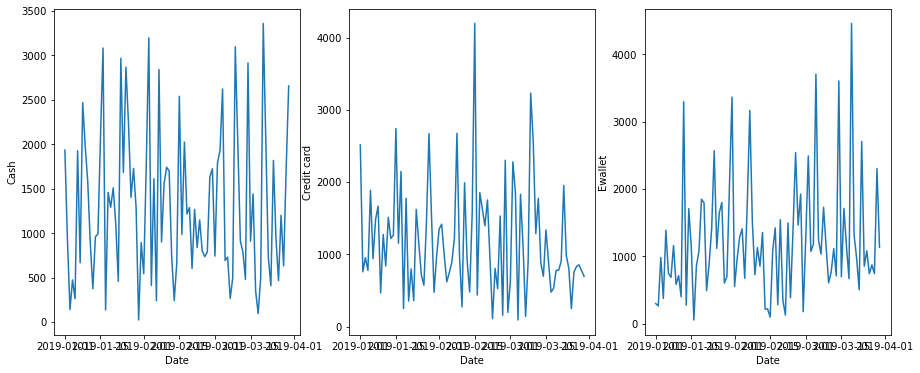

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))

sns.lineplot(data=df_payment, x='Date', y='Cash', ax=ax[0])
sns.lineplot(data=df_payment, x='Date', y='Credit card', ax=ax[1])
sns.lineplot(data=df_payment, x='Date', y='Ewallet', ax=ax[2]);

Perceba que mesmo aumentando a figura não foi possível identificar de forma legível as informações do eixo x (datas), por isso realizar os subplots com 3 linhas e apenas 1 coluna pode tornar o gráfico melhor para leitura.

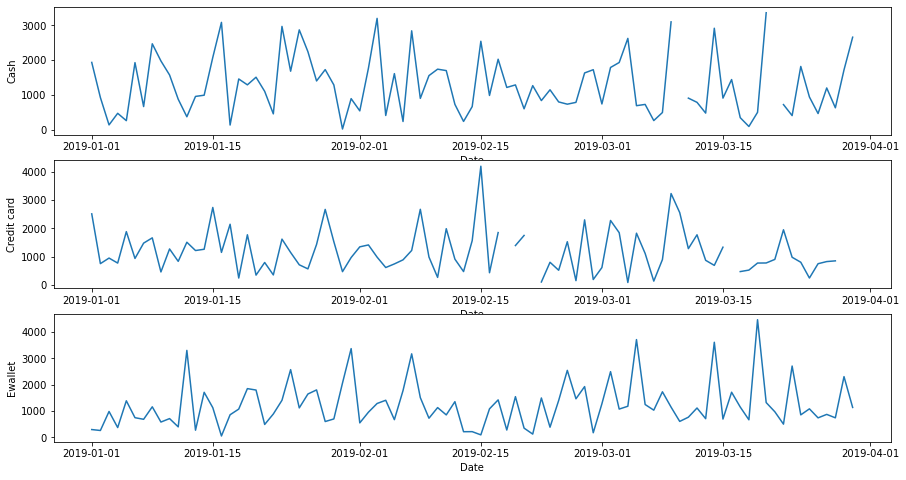

In [21]:
fig, ax = plt.subplots(3, 1, figsize=(15,8))

sns.lineplot(data=df_payment, x='Date', y='Cash', ax=ax[0])
sns.lineplot(data=df_payment, x='Date', y='Credit card', ax=ax[1])
sns.lineplot(data=df_payment, x='Date', y='Ewallet', ax=ax[2]);

## Pizza
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

In [38]:
df_pizza=df_supermarket.pivot_table(index='Branch', values='Quantity', aggfunc='sum');

## Barras
**Documentação**: https://seaborn.pydata.org/generated/seaborn.barplot.html

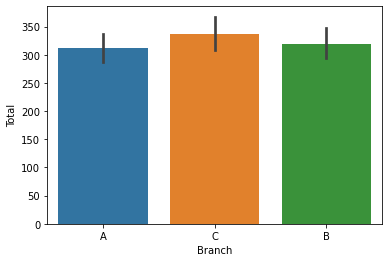

In [39]:
sns.barplot(data=df_supermarket, x='Branch', y='Total');

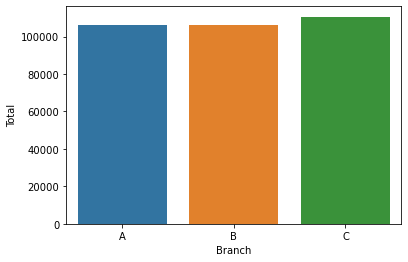

In [40]:
df_bar_1 = df_supermarket.pivot_table(index='Branch', values='Total', aggfunc='sum')
df_bar_1.reset_index(inplace=True)

sns.barplot(data=df_bar_1, x='Branch', y='Total');

In [25]:
df_supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


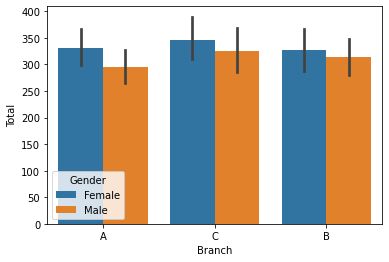

In [41]:
sns.barplot(data=df_supermarket, 
            x='Branch',
            y='Total',
            hue='Gender');

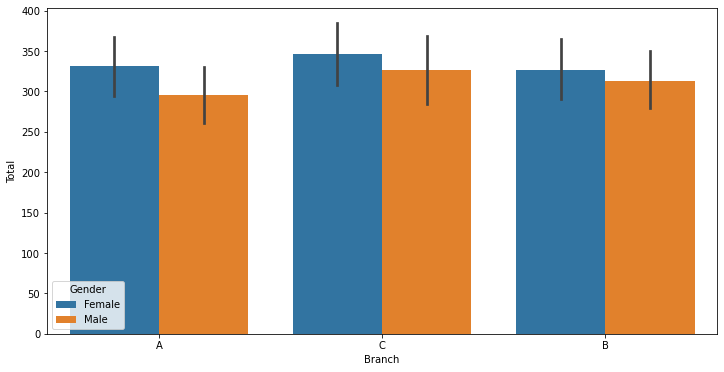

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_supermarket, x='Branch', y='Total', hue='Gender');

**Barras Horizontais**
Para criar o gráfico de barras horizontais basta alterar a ordem dos parâmetros *x* e *y*.

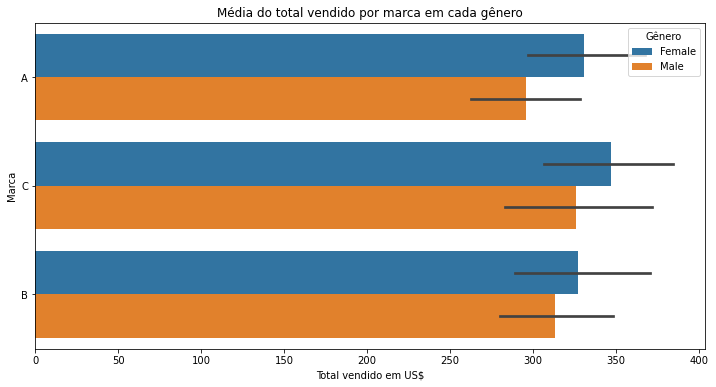

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_supermarket, y='Branch', x='Total', hue='Gender')

#MANTER SOMENTE NO GABARITO
plt.title('Média do total vendido por marca em cada gênero')
plt.ylabel('Marca')
plt.xlabel('Total vendido em US$')
plt.legend(loc='upper right', title='Gênero');

## Histograma
**Documentação**: https://seaborn.pydata.org/generated/seaborn.histplot.html

In [ ]:
sns.histplot(data=df_size, x='body_mass_g', bins=50);

In [ ]:
sns.distplot(x=df_size['body_mass_g']);

## Boxplot
**Documentação**: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
sns.boxplot(data=df_size, x='body_mass_g');

In [ ]:
plt.figure(figsize=(3,5))
sns.boxplot(data=df_size, y='body_mass_g', palette='viridis')

plt.ylabel('Massa corporal (g)');

## Heatmap
**Documentação**: https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
df_corr=df_size[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
corr=df_corr.corr()
corr

In [ ]:
sns.heatmap(corr, cmap='coolwarm');

## Exercício
Agora é hora de praticar!  
  
O conjunto de dados foi baixado da UCI Machine Learning Repository.

Originalmente existiam dois dataframes relacionados com variantes tinto e branco do vinho português "Vinho Verde". Porém para a nossa prática apenas aquele referente aos vinhos brancos será utilizado. Por questões de privacidade e logística, apenas variáveis físico-químicas (entradas) e sensoriais (saídas) estão disponíveis (por exemplo, não há dados sobre tipos de uva, marca de vinho, preço de venda do vinho, etc.).
  
  
Metadados:
  
Variáveis de entrada (físico-químicos):  
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  
  
Variável resposta (Sensorial):  
12 - quality (score between 0 and 10)

Importe a base **winequality-white.csv** que está em csv dentro do diretório **data**.

Verifique com a função **.info** os campos presentes na tabela

Imprima as estatísticas padrões do dataframe com a função **.describe**

### Gráficos

1) Verifique a distribuição da variável resposta para este problema (quality)

2) Verifique se há outliers nas variáveis

3) Construa um gráfico que permita verificar se há relação entre cada uma das variáveis retirando a qualidade dos vinhos (quality)

4) Dê um "zoom" na relação entre as características de densidade e açúcar residual, visto que aparentam ter alta relação. Insira também neste gráfico a variável de qualidade, a fim de verificar se há grupos claramente separados por estas duas características.

5) Baseado no gráfico acima, foi possíve identificar uma relação forte entre as variáveis density e residual sugar. Construa gráficos de barras para verificar a relação da média de cada uma destas características com a qualidade do vinho.

6) Construa gráficos de relação entre todas as variáveis, porém agora insira a variável de qualidade a fim de verificar se é possível separar os grupos.  
Obs.: utilize o pairplot